In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import os
import csv
import seaborn as sns
import sys
import numpy as np
import sklearn

## Import Data

In [2]:
prediction_prob =  pd.read_csv('click_pred_l1reg.txt')
prediction_prob.head()

,bidid,probability,c
0,91c6a6b9e90c0f54d3230815a5a3e22e,0.999681,0.000319
1,24b3621ad3b063b6c09c541781d534b3,0.992683,0.007317
2,6e7bce0a9ad42f479827d37bf9618a9d,0.996831,0.003169
3,6873feca381b8293bf418ba8408a014c,0.998203,0.001797
4,7e6430333c552cf0b32bb21dc792d2df,0.998889,0.001111


In [3]:
predictions =  pd.read_csv('click_pred.txt')
validation =  pd.read_csv('validation.csv')

In [4]:
"""
avgCTR = 0.075396
base_bid = 300

def gen_bid(x):
    bid = (x * base_bid)/avgCTR
    return int(bid)

predictions['payprice'] = validation['payprice']
predictions['click_true'] = validation['click']
predictions['new_bid'] = predictions[" click"].apply(gen_bid)
predictions['win'] = predictions['new_bid'] > predictions['payprice']
predictions[(predictions.click_true == 1) & (predictions.win == True)]
"""

'\navgCTR = 0.075396\nbase_bid = 300\n\ndef gen_bid(x):\n    bid = (x * base_bid)/avgCTR\n    return int(bid)\n\npredictions[\'payprice\'] = validation[\'payprice\']\npredictions[\'click_true\'] = validation[\'click\']\npredictions[\'new_bid\'] = predictions[" click"].apply(gen_bid)\npredictions[\'win\'] = predictions[\'new_bid\'] > predictions[\'payprice\']\npredictions[(predictions.click_true == 1) & (predictions.win == True)]\n'

In [19]:

def click_CTR(base_bid):
    CPC = 0
    avgCTR = 0.075396

    spent = 0
    bids_won = 0
    bids_lost = 0
    clicks = 0
    avgCTR = 0.075396
    budget = 6250
    #print("Auction started")

    def gen_bid(x):
        bid = (x * base_bid)/avgCTR
        return int(bid)

    prediction_prob['payprice'] = validation['payprice']
    prediction_prob['click_true'] = validation['click']
    prediction_prob['new_bid'] = prediction_prob['probability'].apply(gen_bid)
    prediction_prob['win'] = prediction_prob['new_bid'] > prediction_prob['payprice']
    #prediction_prob['click_won'] = [(prediction_prob.click_true == 1) & (prediction_prob.win == True)]
    #bids_won = sum(prediction_prob['win']*1)
    #bids_lost = len(prediction_prob['win']) - bids_won
    #win_ratio = sum(prediction_prob['win']*1) / len(prediction_prob['win'])
    #clicks = len(prediction_prob[(prediction_prob.click_true == 1) & (prediction_prob.win == True)])
        
    for idx in prediction_prob.index:
        if prediction_prob["win"][idx] == True:
            budget -= (prediction_prob["payprice"][idx]) / 1000
            spent += (prediction_prob["payprice"][idx]) / 1000
            bids_won += 1
        else:
            bids_lost += 1

        if prediction_prob['win'][idx] == True and prediction_prob['click_true'][idx] == 1:
            clicks += 1
    
        if budget <= 0:
            print("Budget spent!")
            break    
        
    if clicks == 0:
        CTR = 0
        eCPC = 0
    else:
        CTR = (clicks / bids_won)*100
        eCPC = spent / clicks 
    print(str(bids_lost) + ' bids were lost')
    print(str(bids_won) + ' bids were won')
    print(str(clicks) + ' clicks were won')
    print(str(spent) + ' was spent')
    print("CTR was " + str(CTR))
    print("eCost per click was " + str(eCPC))
    
    return CTR



In [34]:
click_CTR(40)

Budget spent!
5 bids were lost
78060 bids were won
67 clicks were won
6250.034 was spent
CTR was 0.08583141173456316
eCost per click was 93.2840895523


0.08583141173456316

In [38]:
imp = 113229
(imp / 6250) *1000

18116.64

Budget spent!
Budget spent!
Budget spent!
Budget spent!
Budget spent!
Budget spent!
Budget spent!
Budget spent!
Budget spent!
Budget spent!
Budget spent!
Budget spent!
Budget spent!
Budget spent!
Budget spent!
Budget spent!
Budget spent!
Budget spent!
Budget spent!
Budget spent!
Budget spent!
Budget spent!
Budget spent!
Budget spent!
Budget spent!
Budget spent!
Budget spent!
Budget spent!
Budget spent!
Budget spent!
Budget spent!
Budget spent!
Budget spent!
Budget spent!
Budget spent!
Budget spent!
Budget spent!
Budget spent!
Budget spent!
Budget spent!
Budget spent!
Budget spent!
Budget spent!
Budget spent!
Budget spent!
Budget spent!
Budget spent!
Budget spent!
Budget spent!
Budget spent!
Budget spent!
Budget spent!
Budget spent!
Budget spent!
Budget spent!
Budget spent!
Budget spent!
Budget spent!
Budget spent!
Budget spent!
Budget spent!
Budget spent!
Budget spent!
Budget spent!
Budget spent!
Budget spent!
Budget spent!
Budget spent!
Budget spent!
Budget spent!
Budget spent!
Budget

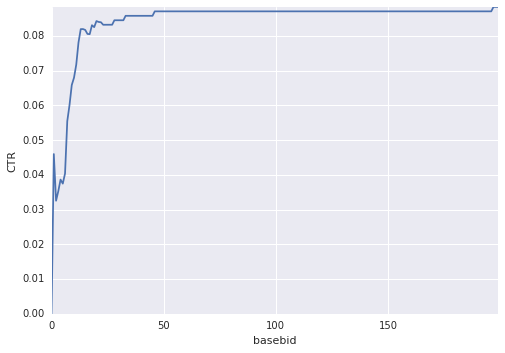

In [18]:
import seaborn as sns
def plot_base_bid(base_bid_range):
    """
    Returns plots of basebids against the CTR rates
    """
    rates = []
    basebids = [x for x in range(0, base_bid_range)]
    for baseb in basebids:
        rate = click_CTR(baseb)
        rates.append(rate)
        
    rates = np.array(rates)
    sns.set_style("darkgrid")
    plt.plot(basebids, rates)
    ymin, ymax = plt.ylim()
    plt.xlabel('basebid')
    plt.ylabel('CTR')
    #plt.title('Linear Model: CTR vs Basebids ')
    plt.axis('tight')
    return plt.show()

plot_base_bid(200)



In [ ]:
pred_ = predictions
def plot_base_bid(base_bid_range, validation, pred_):
    ""
    Returns plots of basebids against the CTR rates
    ""
    rates = []
    basebids = [x for x in range(300, base_bid_range)]
    for baseb in basebids:
        rate = run_auction_2(validation, baseb, pred_)
        rates.append(rate)
        
    rates = np.array(rates)
    plt.plot(basebids, rates)
    ymin, ymax = plt.ylim()
    plt.xlabel('basebids')
    plt.ylabel('CTR')
    plt.title('Linear CTRs ')
    plt.axis('tight')
    return plt.show()

#plot_base_bid(400, validation, pred_)
def run_auction_2(predictions, base_bid, pred_):
    
    print("Auction started")
    counter = 0
    bids_won = 0
    bids_lost = 0
    clicks = 0
    avgCTR = 0.075396
    budget = 6250
    
    for idx in predictions.index:
        bid_id = predictions[' click'][idx]
        
        def gen_bid(base_bid):
            bid = (predictions.iloc[idx] * base_bid)/avgCTR
            return bid 
        
        if validation.iloc[idx]['payprice'] < gen_bid(base_bid):
            budget -= validation.iloc[idx]['payprice'] / 1000
            bids_won += 1
        else:
            bids_lost += 1

        if validation.iloc[idx]['payprice'] < gen_bid(base_bid) and validation.iloc[idx]['click'] == 1:
            clicks += 1

        if budget <= 0:
            print("Budget spent!")
            break 
                
    CPC = clicks / 6250
    finalCTR = clicks / bids_won
      
    print(str(bids_lost) + ' bids were lost')
    print(str(bids_won) + ' bids were won')
    print(str(clicks) + ' clicks were won')
    print("CTR was " + str(finalCTR))
    print("Cost per click was " + str(CPC))
    
    return finalCTR

run_auction_2(predictions, 300, pred_)  


$$
\begin{table}[H]
    \centering
    \caption{Random bidding model evaluation on validation set} 
    \label{tab:2}
    \resizebox{\linewidth}{!}{%
    \begin{tabular}{rrrrrrr}
    \toprule
    Upper value &  Clicks & Impr  &    CTR &    CPM &    eCPC \\
    \midrule
        250 &      9 &       5,265  &  0.170 &  1187.08 &  694.44 \\
        267 &     26 &      20,139  &  0.129 &  310.34 &   240.38 \\
        319 &     36 &      42,788  &  0.084 &  146.06 &   173.61 \\
        348 &     59 &      64,028  &  0.092 &  97.61 &   105.93 \\
        445 &    101 &     115,263  &  0.087 &  54.22 &   61.88 \\
        547 &    125 &     149,957  &  0.083 &  41.67 &   50.00 \\
    \bottomrule
    \end{tabular}
    }
\end{table}
$$